In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import time
import json
import requests
from datetime import date

In [1]:
pip install pandas

     |████████████████████████████████| 11.5 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 50.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 76.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 44.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install quandl

     |████████████████████████████████| 48 kB 3.3 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [9]:
quandl.ApiConfig.api_key = '42aRS9U6px82Z654d2Du'
US_TREASURY=quandl.get('USTREASURY/REALYIELD', start_date='2015-01-01', end_date='2021-04-27')

In [10]:
US_TREASURY.head()

,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,
2015-01-02,0.31,0.37,0.41,0.61,0.76
2015-01-05,0.32,0.36,0.40,0.57,0.71
2015-01-06,0.34,0.36,0.41,0.55,0.68
2015-01-07,0.31,0.35,0.39,0.55,0.68
2015-01-08,0.29,0.38,0.41,0.60,0.73


In [11]:
US_TREASURY=US_TREASURY.reset_index()

In [12]:
int(time.mktime(time.strptime('2021-04-27', '%Y-%m-%d')))

1619481600

In [13]:
URL="https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&toTs=1619478000&api_key="

In [14]:
answer=requests.get(URL)
data=json.loads(answer.text)
data=data['Data']
data=data['Data']
data

[{'time': 1446595200,
  'high': 492.8,
  'low': 368.62,
  'open': 396.49,
  'volumefrom': 517733.91,
  'volumeto': 229673024.39,
  'close': 400.89,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1446681600,
  'high': 447.24,
  'low': 366.08,
  'open': 400.89,
  'volumefrom': 302953.09,
  'volumeto': 121763708.16,
  'close': 382.7,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1446768000,
  'high': 396.35,
  'low': 348.84,
  'open': 382.7,
  'volumefrom': 255274.81,
  'volumeto': 94921694.02,
  'close': 369.81,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1446854400,
  'high': 391.75,
  'low': 368.98,
  'open': 369.81,
  'volumefrom': 103025.55,
  'volumeto': 39495095,
  'close': 385.09,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1446940800,
  'high': 389.78,
  'low': 365.49,
  'open': 385.09,
  'volumefrom': 94356.82,
  'volumeto': 35907981.64,
  'close': 371.56,
  'conversionType': 'direct',
  'conv

In [15]:
rows=[]
for entries in data:
    epoch=entries['time']
    date=time.strftime('%Y/%m/%d',time.localtime(epoch))
    closing_price=entries['close']
    rows.append((date,closing_price))

In [16]:
rows

[('2015/11/04', 400.89),
 ('2015/11/05', 382.7),
 ('2015/11/06', 369.81),
 ('2015/11/07', 385.09),
 ('2015/11/08', 371.56),
 ('2015/11/09', 380.22),
 ('2015/11/10', 336.69),
 ('2015/11/11', 304.71),
 ('2015/11/12', 333.85),
 ('2015/11/13', 333.77),
 ('2015/11/14', 331.77),
 ('2015/11/15', 317.45),
 ('2015/11/16', 330.21),
 ('2015/11/17', 333.91),
 ('2015/11/18', 335.92),
 ('2015/11/19', 324.98),
 ('2015/11/20', 321.12),
 ('2015/11/21', 324.7),
 ('2015/11/22', 322.78),
 ('2015/11/23', 322.12),
 ('2015/11/24', 318.35),
 ('2015/11/25', 327.52),
 ('2015/11/26', 353.74),
 ('2015/11/27', 359.52),
 ('2015/11/28', 355.83),
 ('2015/11/29', 370.84),
 ('2015/11/30', 377.97),
 ('2015/12/01', 361.8),
 ('2015/12/02', 359.98),
 ('2015/12/03', 360.31),
 ('2015/12/04', 361.67),
 ('2015/12/05', 386.69),
 ('2015/12/06', 393.38),
 ('2015/12/07', 394.28),
 ('2015/12/08', 410.67),
 ('2015/12/09', 416),
 ('2015/12/10', 415.49),
 ('2015/12/11', 449.83),
 ('2015/12/12', 432.29),
 ('2015/12/13', 434.69),
 ('201

In [17]:
BTC=pd.DataFrame(rows)
BTC.columns=['date','close price']
BTC['date']=pd.to_datetime(BTC['date'])
BTC.head()

,date,close price
0,2015-11-04,400.89
1,2015-11-05,382.70
2,2015-11-06,369.81
3,2015-11-07,385.09
4,2015-11-08,371.56


In [18]:
table=pd.merge(BTC,US_TREASURY,left_on='date',right_on='Date')
table=table[['date','close price','10 YR']]
table=table.set_index(['date'])
table.head()

,close price,10 YR
date,,
2015-11-04,400.89,0.68
2015-11-05,382.70,0.71
2015-11-06,369.81,0.75
2015-11-09,380.22,0.76
2015-11-10,336.69,0.77


In [19]:
xt=table['10 YR'].values.tolist()
yt=table['close price'].values.tolist()

In [20]:
xt = (xt - np.mean(xt))/(np.std(xt))
yt = (yt - np.mean(yt))/(np.std(yt))

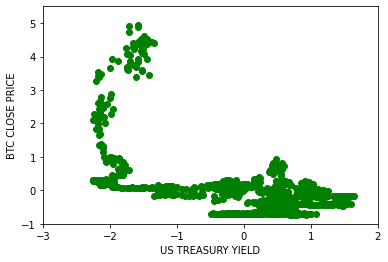

In [21]:
plt.plot(xt,yt,'go')
plt.xlabel("US TREASURY YIELD")
plt.ylabel("BTC CLOSE PRICE")
_ =plt.axis([-3,2,-1,5.5])

In [22]:
beta = ((np.multiply(yt, xt)).mean()-np.mean(xt)*np.mean(yt))/((np.multiply(xt, xt)).mean()-np.mean(xt)*np.mean(xt))
alpha =np.mean(yt)-beta*np.mean(xt)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 1.247478102285472e-16 
beta = -0.5500166264813102


In [23]:
yt_hat = alpha + np.multiply(beta,xt)
L = np.sum(np.multiply(yt - yt_hat,yt - yt_hat))
L

953.4574983821606

In [24]:
def  cal_cost(alpha,beta,xt,yt):
        n = len(yt)
        predictions = alpha + np.multiply(beta,xt)
        cost = (1/2*n) * np.sum(np.square(predictions-yt))
        return cost
cal_cost(alpha,beta,xt,yt)

651688.2001442068

In [25]:
cal_cost(-11,beta,xt,yt)

113707372.70014423

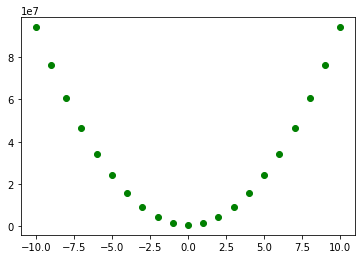

In [26]:
iterations = 21
alpha = -11

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    alpha = alpha +1
    
    loss_history[i] = cal_cost(alpha,beta,xt,yt)
    alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

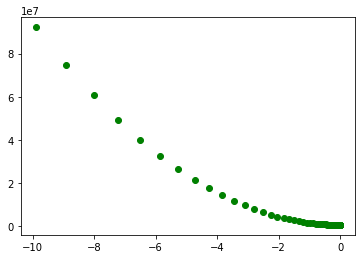

In [27]:
iterations = 1000
alpha = -11
n = len(yt)

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    
        
        prediction = alpha + np.multiply(beta,xt)
        residuals = yt-prediction
        residuals_sum = sum(residuals)
        gradient = -(1/n)*0.1*residuals_sum
 
        alpha = alpha - gradient
    
        loss_history[i] = cal_cost(alpha,beta,xt,yt)
        alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')